In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

import dataretrieval.nwis as nwis

#import os.path

13092747 (2013-2023) Non-ref

" " 

12413370 (2010-2021) ref, 2490, 28.2

" "

13266000 ref (2017-2018)

" "

 13311000 (2012-2023) Usgs:  646619.3

" "

12305000 (2012-2023)

" "

13340600


In [2]:
site  = "13341050"
# get basic info about the site
df3 = nwis.get_record(sites=site, service='site')

print(df3.columns)
dec_lat_va=df3['dec_lat_va'][0]
dec_long_va=df3['dec_long_va'][0]
station_nm=df3['station_nm'][0]
alt_va =df3['alt_va'][0] 
drain_area_va=df3['drain_area_va'][0] 

#print(station_nm)
print(df3[['alt_va', 'alt_meth_cd', 'alt_acy_va', 'drain_area_va', 'contrib_drain_area_va']])

Index(['agency_cd', 'site_no', 'station_nm', 'site_tp_cd', 'lat_va', 'long_va',
       'dec_lat_va', 'dec_long_va', 'coord_meth_cd', 'coord_acy_cd',
       'coord_datum_cd', 'dec_coord_datum_cd', 'district_cd', 'state_cd',
       'county_cd', 'country_cd', 'land_net_ds', 'map_nm', 'map_scale_fc',
       'alt_va', 'alt_meth_cd', 'alt_acy_va', 'alt_datum_cd', 'huc_cd',
       'basin_cd', 'topo_cd', 'instruments_cd', 'construction_dt',
       'inventory_dt', 'drain_area_va', 'contrib_drain_area_va', 'tz_cd',
       'local_time_fg', 'reliability_cd', 'gw_file_cd', 'nat_aqfr_cd',
       'aqfr_cd', 'aqfr_type_cd', 'well_depth_va', 'hole_depth_va',
       'depth_src_cd', 'project_no'],
      dtype='object')
   alt_va alt_meth_cd  alt_acy_va  drain_area_va  contrib_drain_area_va
0  940.08           Z        0.11           7976                    NaN


In [3]:
path=  r"../data_prep/prism_df_summer_" +site +".csv"  # os.path.join( r"../data_prep/prism_df_summer_",  site ,".csv" )

data=pd.read_csv( path )  

#12413370,13190500,13018300, 13211205
#13266000,12398600, 13307000
#13296000 (Yankee Fork Salmon River NR Clayton ID),
#13311000, 13340600, 13092747, 12305000, 13342500, 13150430, 13016450, 13176400, 13310800, 13317660, 13192200, 12322000, 13139510,13341050

print(data)
print(data.columns)

      Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0            130  2008-06-01      6.86               9.3               17.8   
1            131  2008-06-02      4.34              10.1               15.3   
2            132  2008-06-03      2.63               7.1               13.0   
3            133  2008-06-04      4.41               6.9               12.0   
4            134  2008-06-05      0.35               7.7               10.9   
...          ...         ...       ...               ...                ...   
1461        5567  2023-08-27      0.00              14.7               24.8   
1462        5568  2023-08-28      0.00              15.2               25.6   
1463        5569  2023-08-29      0.00              15.2               26.0   
1464        5570  2023-08-30      8.32              14.4               22.0   
1465        5571  2023-08-31      2.56              12.8               15.1   

      tmax..degrees.C.  tdmean..degrees.C.  vpdmin.

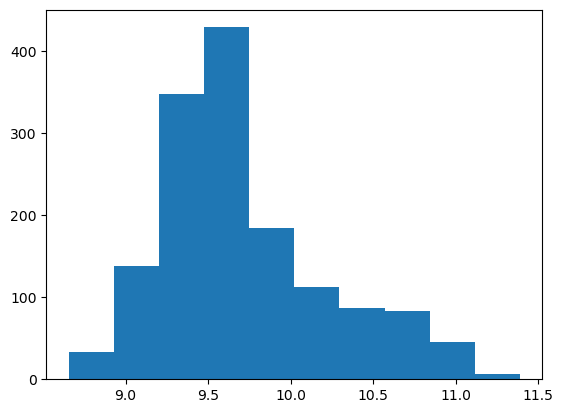

(array([614., 511., 136.,  69.,  54.,  56.,  18.,   3.,   2.,   3.]),
 array([ 5750., 14005., 22260., 30515., 38770., 47025., 55280., 63535.,
        71790., 80045., 88300.]),
 <BarContainer object of 10 artists>)

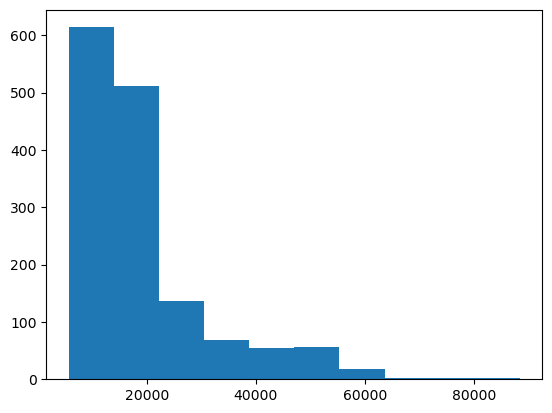

In [4]:
data['log_Q']=np.log(data['X_00060_00003'])
data
plt.hist(data['log_Q'])
plt.show()
plt.hist(data['X_00060_00003'])

Text(0, 0.5, 'Streamflow (cfs)')

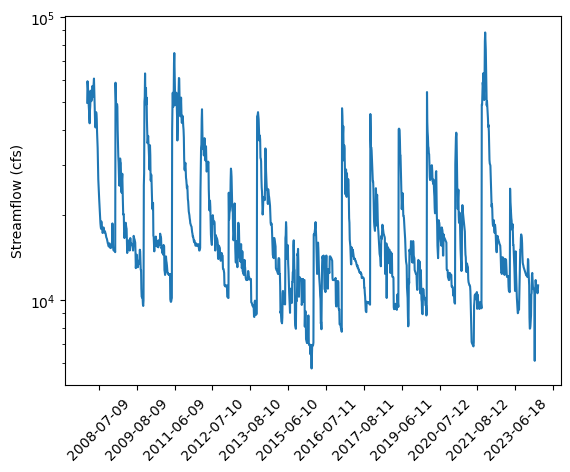

In [5]:
plt.plot(data['Date'] , data['X_00060_00003'] )
plt.yscale('log')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Streamflow (cfs)")

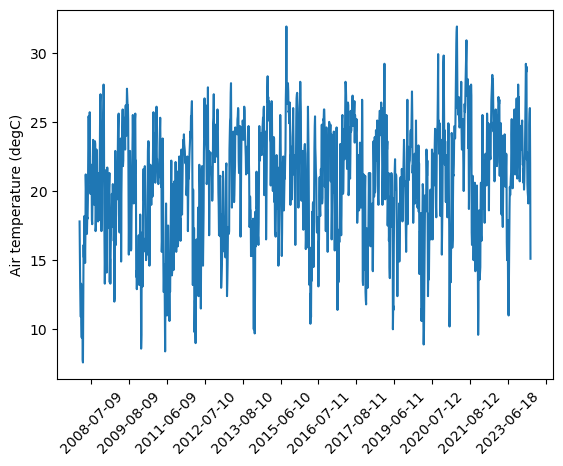

In [6]:
plt.plot(data['Date'] , data['tmean..degrees.C.'] )


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

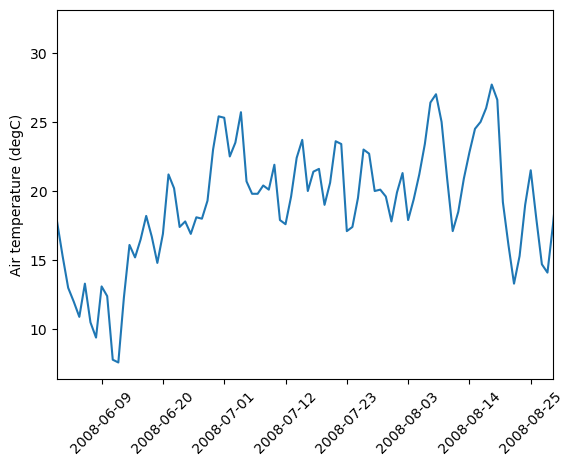

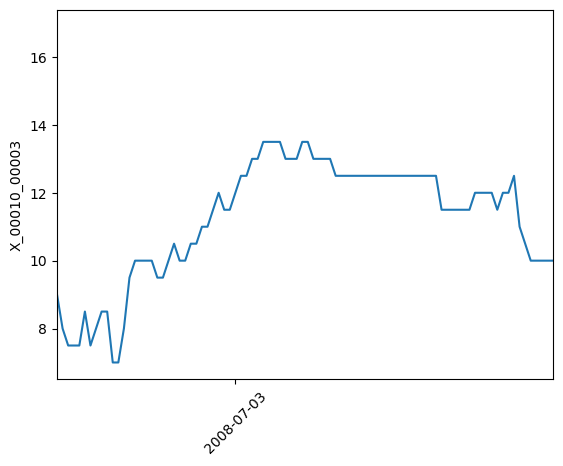

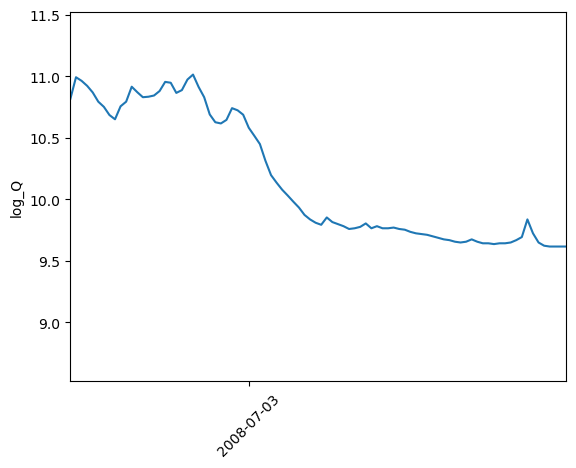

In [7]:
start=0
end=89

plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.xlim(  data['Date'][start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

plt.plot(data['Date'] , data['X_00010_00003'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('X_00010_00003')
plt.show()

plt.plot(data['Date'] , data['log_Q'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('log_Q')
plt.show()

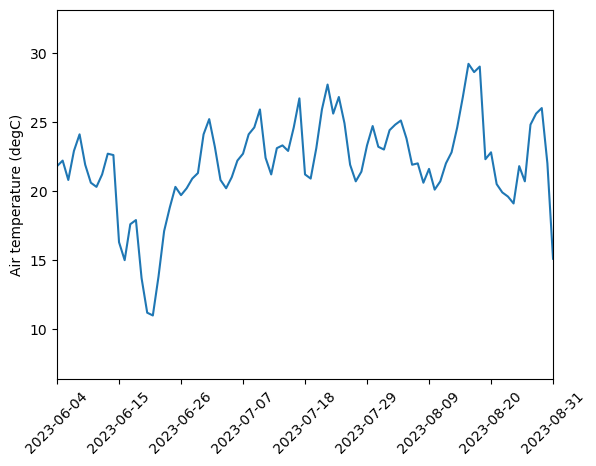

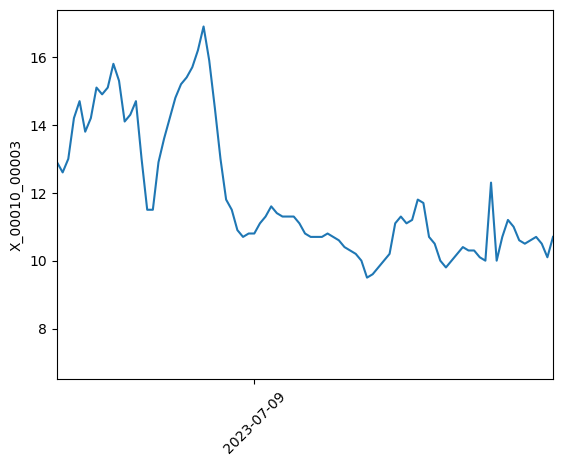

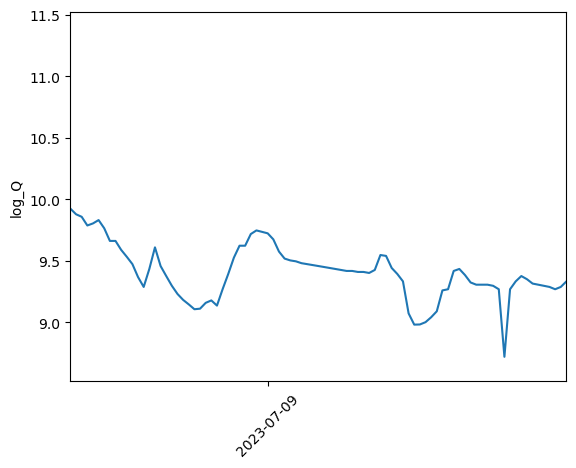

In [8]:
start=len(data)-89
end=len(data)-1

plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.xlim(  data['Date'][start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

plt.plot(data['Date'] , data['X_00010_00003'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('X_00010_00003')
plt.show()

plt.plot(data['Date'] , data['log_Q'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('log_Q')
plt.show()

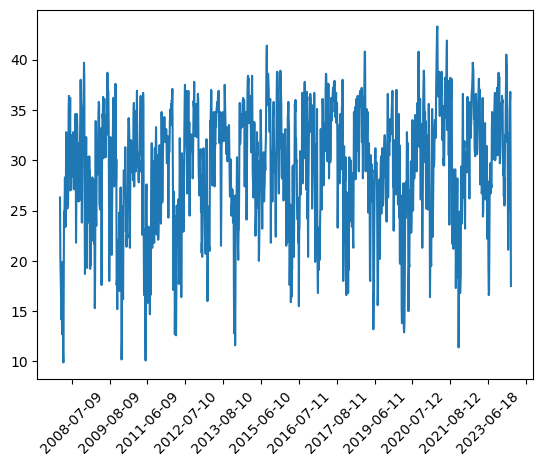

In [9]:
plt.plot(data['Date'] , data[ 'tmax..degrees.C.'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

Text(0, 0.5, 'Water temperature (degC)')

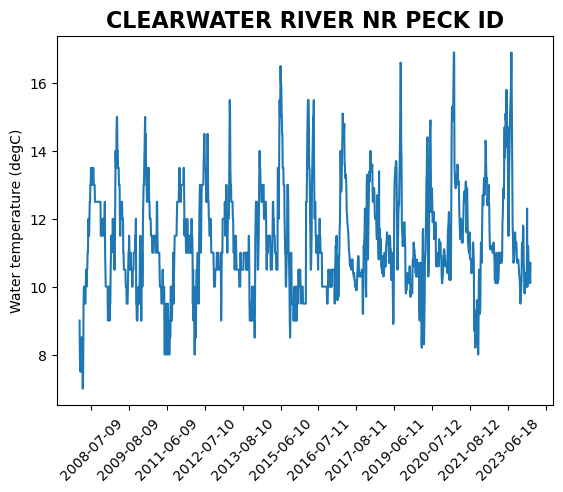

In [10]:
plt.plot(data['Date'] , data[ 'X_00010_00003'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.ylabel("Water temperature (degC)")

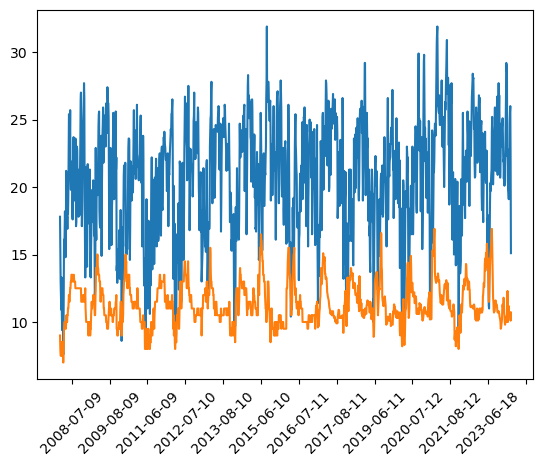

In [11]:
plt.plot(data['Date'] , data[ 'tmean..degrees.C.'] )
plt.plot(data['Date'] , data[ 'X_00010_00003'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

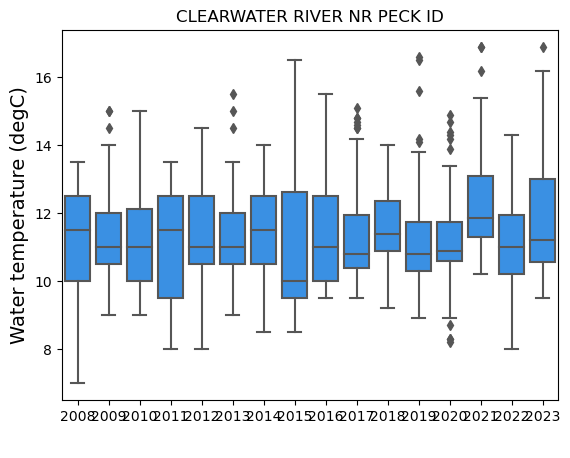

In [12]:
#data.boxplot(column=['X_00010_00003'], by='yr', title=station_nm)

#plt.ylabel("Water temperature (degC)")

ax=sns.boxplot(x="yr", y="X_00010_00003", data=data , color="dodgerblue")
ax.set_ylabel( "Water temperature (degC)" , fontsize=14 #, color="red"
             )
ax.set_xlabel( " " , fontsize=14 #, color="red"
             )
ax.set_title( station_nm)
plt.show()

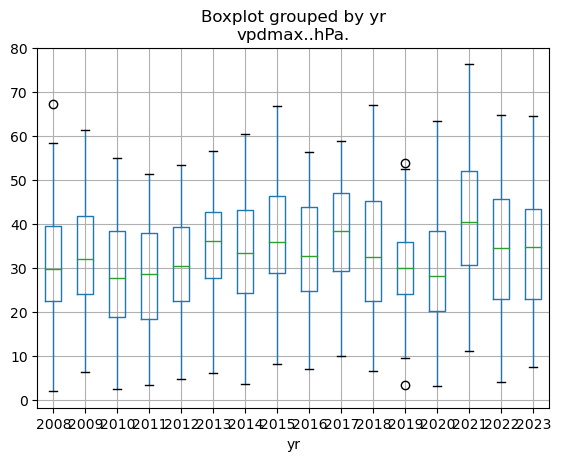

In [13]:
# 'vpdmax..hPa.'
data.boxplot(column=['vpdmax..hPa.'], by='yr')
plt.show()

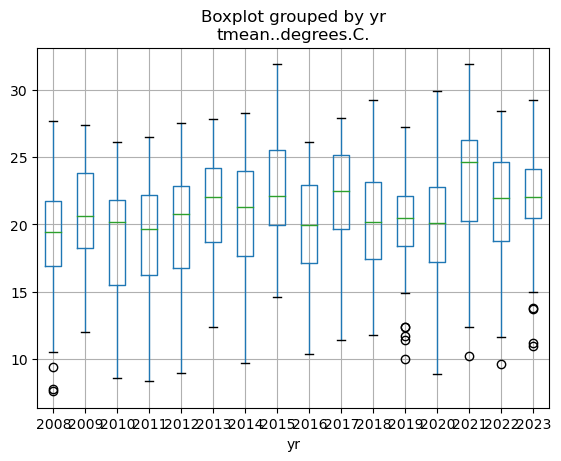

In [14]:
data.boxplot(column=['tmean..degrees.C.'], by='yr')
plt.show()

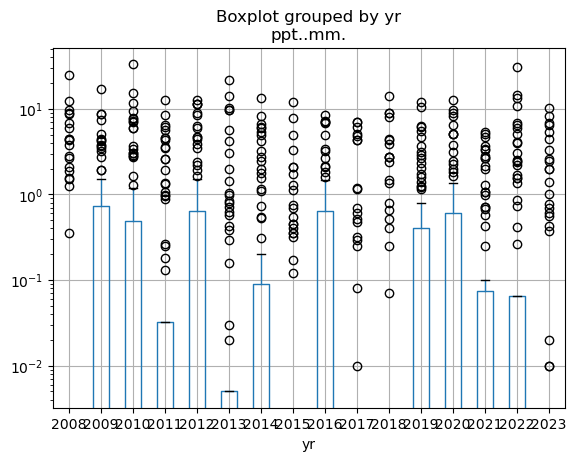

In [15]:
data.boxplot(column=['ppt..mm.'], by='yr')

plt.yscale('log')
plt.show()

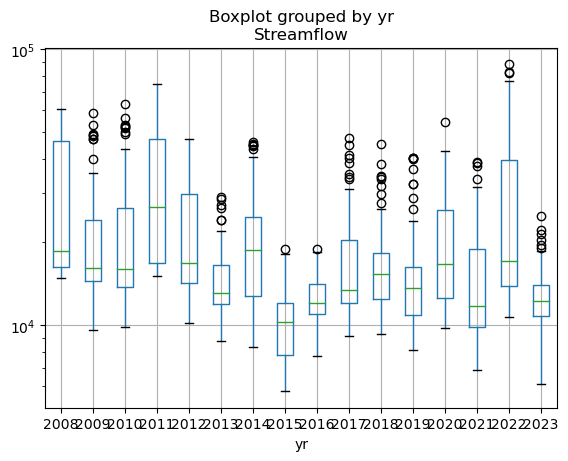

In [16]:
data.boxplot(column=['X_00060_00003'], by='yr')
plt.yscale('log')
plt.title("Streamflow")
plt.show()

In [17]:
#data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

                    ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
ppt..mm.            1.000000         -0.136097          -0.355066   
tmin..degrees.C.   -0.136097          1.000000           0.873612   
tmean..degrees.C.  -0.355066          0.873612           1.000000   
tmax..degrees.C.   -0.433556          0.723700           0.968006   
tdmean..degrees.C.  0.228633          0.503425           0.237233   
vpdmin..hPa.       -0.373903          0.636134           0.773116   
vpdmax..hPa.       -0.423632          0.642282           0.914327   
X_00010_00003      -0.170629          0.199882           0.230536   
X_00060_00003       0.300323         -0.379263          -0.475902   
doy                -0.204934          0.352987           0.454047   
log_Q               0.264031         -0.383925          -0.471937   

                    tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  \
ppt..mm.                   -0.433556            0.228633     -0.373903   
tmin..degrees.C.       

<Axes: >

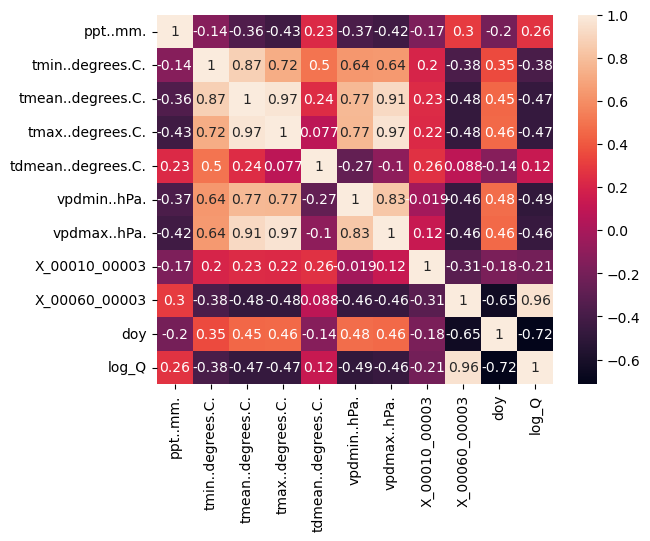

In [18]:
all_idv=[ 'ppt..mm.' 
     , 'tmin..degrees.C.'
     ,'tmean..degrees.C.'
     , 'tmax..degrees.C.', 'tdmean..degrees.C.',
      'vpdmin..hPa.', 
     'vpdmax..hPa.', 
   #     'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy','log_Q' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q
ppt..mm.           1.000000          -0.355066     -0.423632  0.264031
tmean..degrees.C. -0.355066           1.000000      0.914327 -0.471937
vpdmax..hPa.      -0.423632           0.914327      1.000000 -0.462154
log_Q              0.264031          -0.471937     -0.462154  1.000000


<Axes: >

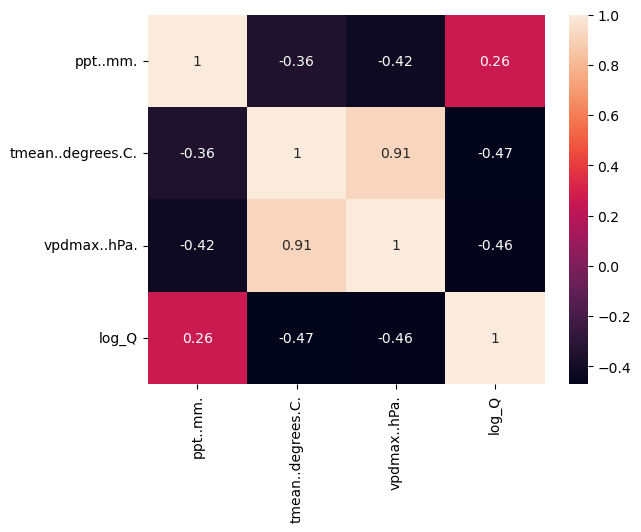

In [19]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.' #, 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
     #  'X_00060_00003' #,   'yr', 'mo',
    # ,'doy'
     ,'log_Q'
    ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

In [20]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_train.columns)

      ppt..mm.  tmean..degrees.C.  vpdmax..hPa.      log_Q
654       0.00               22.1         35.18   9.457200
1438      0.00               25.1         51.41   8.980927
254       1.19               21.5         32.67   9.441452
1070      0.00               20.8         36.14   9.417355
1279      0.00               20.0         29.35   9.197255
...        ...                ...           ...        ...
1130      0.69               22.2         32.72   9.918376
1294     31.04               14.7         10.81  11.325390
860       0.00               24.5         39.62   9.622450
1459      0.00               21.8         31.45   9.314700
1126      0.00               18.9         21.94  10.169691

[1172 rows x 4 columns]
654     16.0
1438    11.3
254     11.0
1070    10.1
1279    11.3
        ... 
1130    14.4
1294     8.6
860     14.8
1459    10.6
1126    12.3
Name: X_00010_00003, Length: 1172, dtype: float64
Index(['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q'], dtype='o

In [21]:
print(idv)
idv2=idv +  ['yr' ]
print(idv2)
idv3=idv2 +  [  'X_00010_00003']
input=  data[  idv2]
#input
X=input[idv2]




X_train=X[X['yr']<2021]
#print(X_train)
X_test=X[X['yr']>=2021]

input2=  data[  idv3]
Y=input2[idv3]
y_train=Y[Y['yr']<2021][  'X_00010_00003']
print(y_train)

y_test=Y[Y['yr']>=2021][  'X_00010_00003']


['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q', 'yr']
0        9.0
1        8.0
2        7.5
3        7.5
4        7.5
        ... 
1191    10.7
1192    10.7
1193    10.7
1194    10.5
1195    10.4
Name: X_00010_00003, Length: 1196, dtype: float64


In [22]:
print(X_train)

X_train=X_train[[ 'ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']]
X_test= X_test[[ 'ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']]

      ppt..mm.  tmean..degrees.C.  vpdmax..hPa.      log_Q    yr
0         6.86               17.8         23.98  10.817776  2008
1         4.34               15.3         10.89  10.992050  2008
2         2.63               13.0         14.10  10.963012  2008
3         4.41               12.0         10.46  10.922335  2008
4         0.35               10.9          6.93  10.868568  2008
...        ...                ...           ...        ...   ...
1191      0.00               22.6         38.08   9.259131  2020
1192      0.00               21.4         38.79   9.249561  2020
1193      0.00               20.9         38.21   9.194211  2020
1194      0.00               20.4         36.67   9.189117  2020
1195      0.02               18.1         26.58   9.183996  2020

[1196 rows x 5 columns]


0.3614497883686018


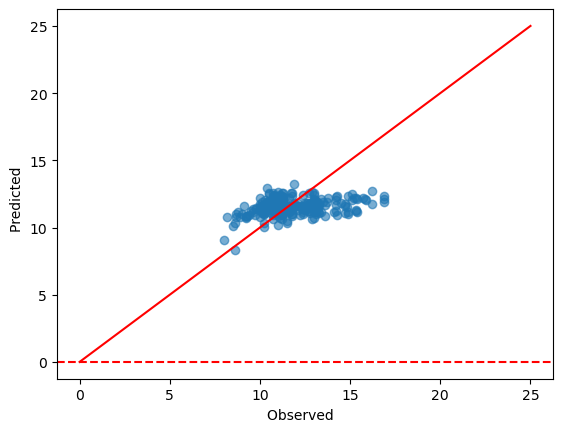

test: 0.3326471763483593
1.284317184009039


In [23]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed  ")
plt.ylabel("Predicted  ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [24]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.40445935599200833
test correlation_coefficient: 0.3981014622939943
MSE: 1.2269882616542795
RMS: 1.6148664887495625
max depth: 2
test correlation_coefficient: 0.5436304487267936
test correlation_coefficient: 0.4415386309048704
MSE: 1.134644915281668
RMS: 1.6154308501059003
max depth: 3
test correlation_coefficient: 0.6240454091949782
test correlation_coefficient: 0.4945197646623182
MSE: 1.1055732284419142
RMS: 1.5694889586001974
max depth: 4
test correlation_coefficient: 0.6748260925068967
test correlation_coefficient: 0.521800392227181
MSE: 1.0493088139401392
RMS: 1.5304237708878925
max depth: 5
test correlation_coefficient: 0.7220131380072365
test correlation_coefficient: 0.47489187512510445
MSE: 1.059474337663815
RMS: 1.5686517609964838
max depth: 6
test correlation_coefficient: 0.755172240738141
test correlation_coefficient: 0.4842850762725493
MSE: 1.059294604085523
RMS: 1.5739605087494486
max depth: 7
test correlation_coefficient: 0.7941

max depth: 5
correlation_coefficient: 0.47489187512510445
MSE: 1.059474337663815
RMS: 1.5686517609964838


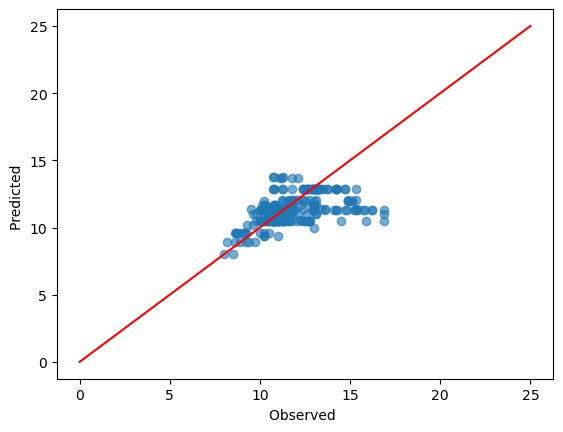

In [25]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [26]:
print(regr.feature_importances_)
print(idv)

[0.01041173 0.24433566 0.07533038 0.66992223]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']


In [27]:
params = {
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [28]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 2.2340


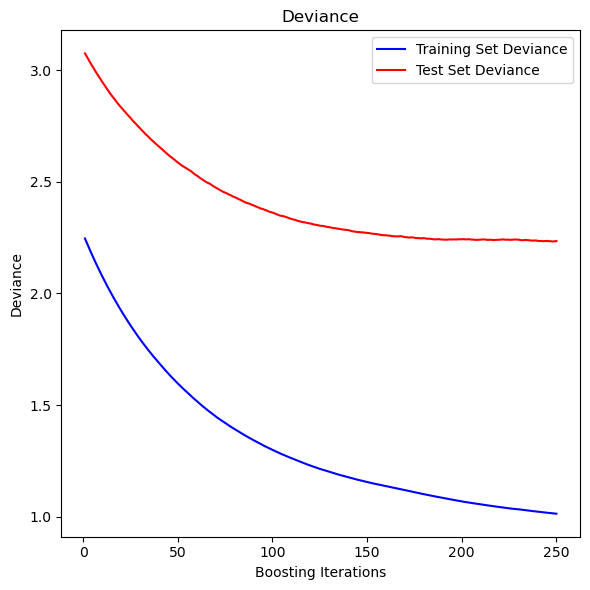

In [29]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

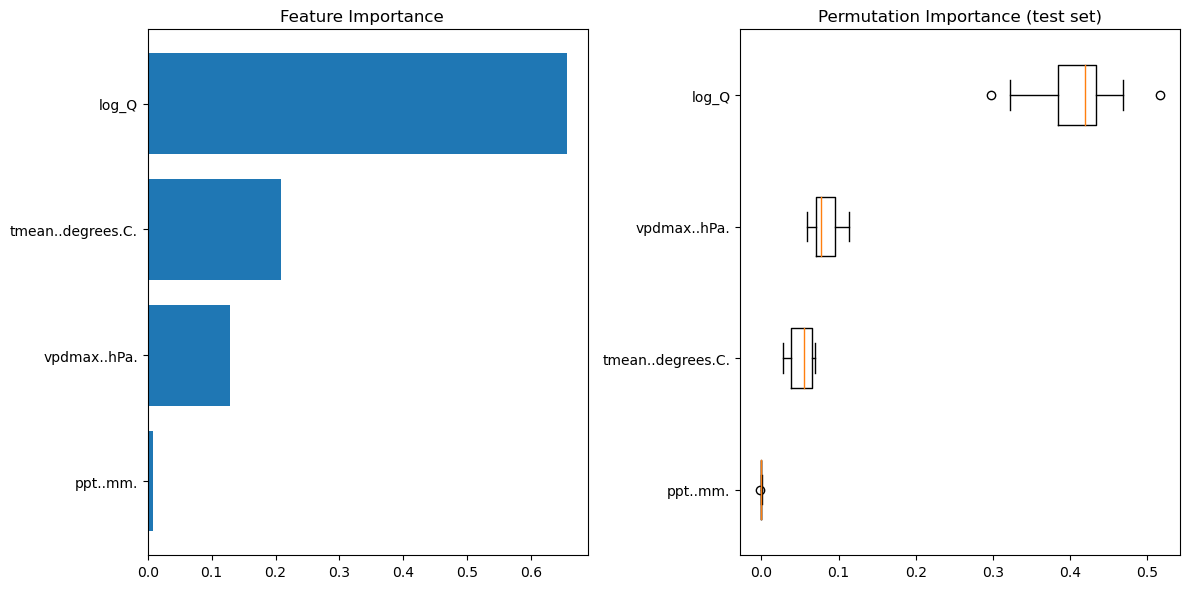

In [30]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [31]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [32]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    
    
    perm_sorted_idx = result.importances_mean.argsort()
    print(perm_sorted_idx)
    print(X.columns[perm_sorted_idx][3])

    
    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax


The plot on the left shows the Gini importance of the model. 

permuting a feature

[0 2 1 3]
log_Q


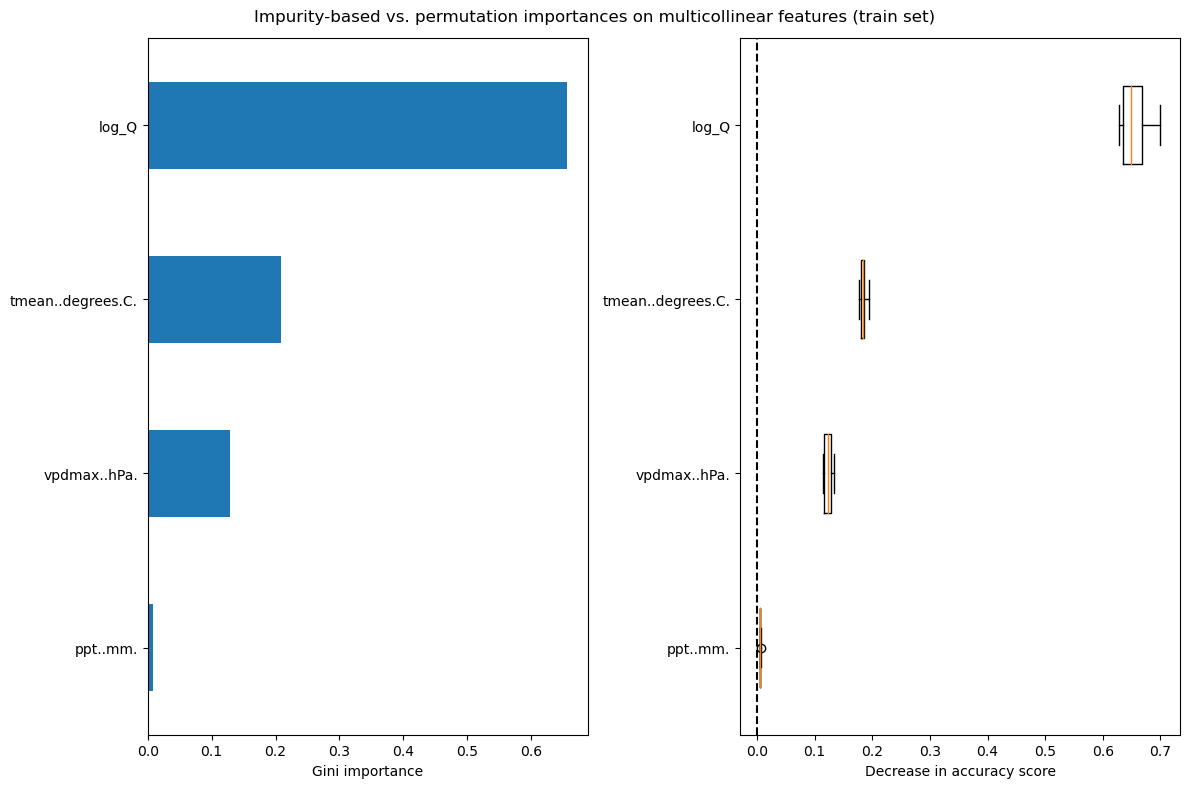

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(reg, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

correlation_coefficient: 0.5575650897455043
MSE: 0.9864056431575595
RMS: 1.4946420795981892


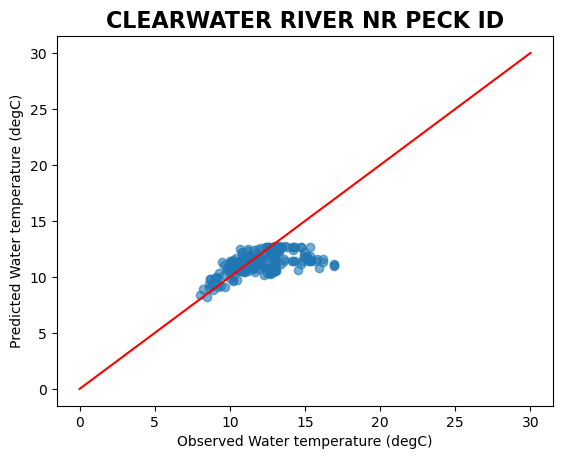

In [34]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed Water temperature (degC)")
plt.ylabel("Predicted Water temperature (degC)")

x = np.linspace(0, 30, 30)
y = x
plt.plot(x, y, color='red')

plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.show()

1196    11.3
1197    11.7
1198    11.8
1199    11.9
1200    12.2
        ... 
1461    10.6
1462    10.7
1463    10.5
1464    10.1
1465    10.7
Name: X_00010_00003, Length: 270, dtype: float64
[11.96931225 11.69288351 11.68538886 11.46200685 10.91103108 10.89400846
  9.69885549 10.45906223 12.37006408 11.61613045 10.08783051 12.3299202
 12.57441577 12.70041095 12.70041095 11.87809779 12.19587208 11.74403225
 11.47141915 11.6365531  11.18982652 11.08425185 12.76460409 12.76460409
 12.70041095 12.76460409 12.47509104 12.35216778 12.25967009 12.36135859
 12.31793107 12.30433045 11.57684082 11.18919978 11.18483366 11.01742486
 10.5998328  10.81234842 11.17969686 11.05278029 11.05278029 11.01742486
 10.41766061 10.73540019 11.10006295 10.7694209  10.89476124 10.89761256
 10.76530595 10.9547561  11.37561895 11.68360694 10.79163923 10.37106658
 10.37131628 10.39609225 10.339279   10.23227993 10.51292463 10.52183292
 10.80606757 11.02195129 11.81567443 10.87860854 11.00839435 11.00839435
 10.89

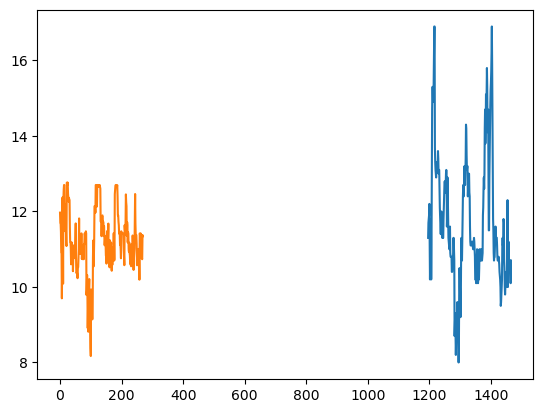

1196    2021-06-01
1197    2021-06-02
1198    2021-06-03
1199    2021-06-04
1200    2021-06-05
           ...    
1461    2023-08-27
1462    2023-08-28
1463    2023-08-29
1464    2023-08-30
1465    2023-08-31
Name: Date, Length: 270, dtype: object


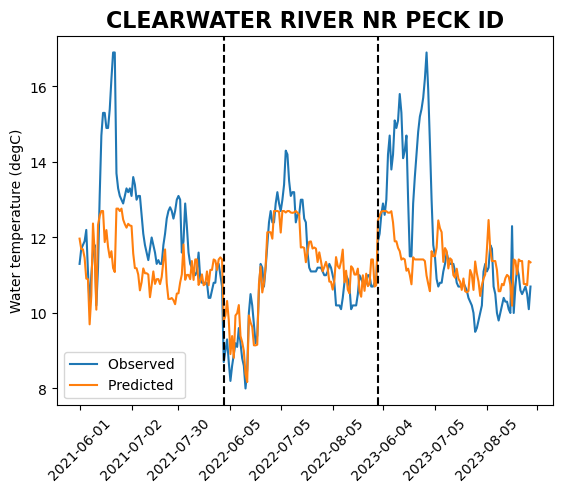

In [35]:



print(y_test)
print(yfit)
print(Y)
plt.plot(y_test)
plt.plot(yfit)
plt.show()

date=data[data['yr']>=2021][  'Date']
print(date)
plt.plot(date,y_test , label='Observed ')

#plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter())  # Formats labels concisely

plt.plot(date,yfit , label='Predicted ')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Display every 10th label
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts for missing dates
plt.axvline(x= "2022-06-01", color='black', linestyle='--')
plt.axvline(x= "2023-06-01", color='black', linestyle='--')
plt.gca().xaxis.set_tick_params(rotation=45 )  # Rotate labels for readability
plt.ylabel("Water temperature (degC)")
#pd.dataframe("date"= ,"y_test"= ,"yfit"=yfit)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.legend()

In [36]:
max_bias=max(yfit-y_test)
max_bias

1.8639439667732116

In [37]:
#plt.hist(y_test , alpha=0.5)
#plt.show()

#plt.hist(yfit , alpha=0.5)
#plt.show()

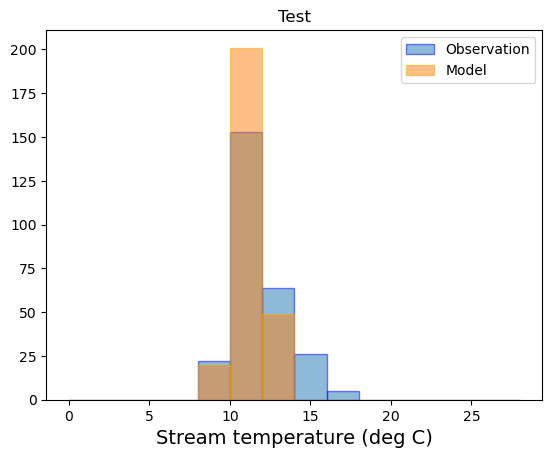

In [38]:
bins = np.arange(10, 25, 2)
bins = np.arange(0, 30, 2)
bars1, _, _ = plt.hist(y_test , alpha=0.5 , label="Observation",bins=bins , edgecolor='blue')
bars2, _, _ = plt.hist(yfit , alpha=0.5, label="Model",bins=bins , edgecolor='orange')
plt.legend(   )
plt.xlabel("Stream temperature (deg C)", fontsize=14 )
plt.title("Test")
plt.show()

In [39]:
#plt.hist(y_test , alpha=0.5)
#plt.hist(yfit , alpha=0.5)

#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["y_test","yfit"])
#plt.legend()

In [40]:
#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["observation","model"])
#plt.legend()
#plt.xlabel("Stream temperature (deg C)", fontsize=14 )
#plt.title("Test")

upper alpha=0.95

correlation_coefficient: 0.5016176541866698
MSE: 1.666403904447604
RMS: 1.9963560001866785


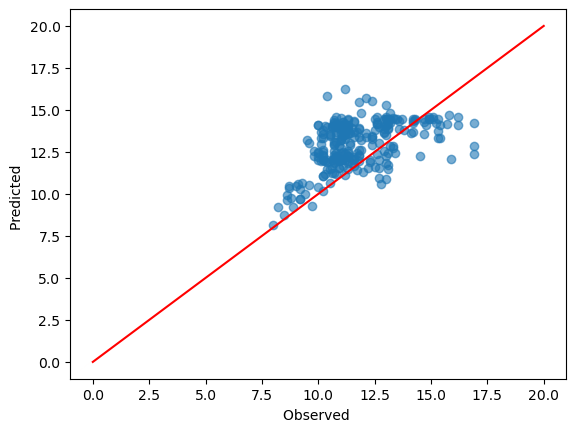

In [41]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

lower upper alpha=0.05

correlation_coefficient: 0.4837104288161841
MSE: 1.8799495736945504
RMS: 2.3996200804392775


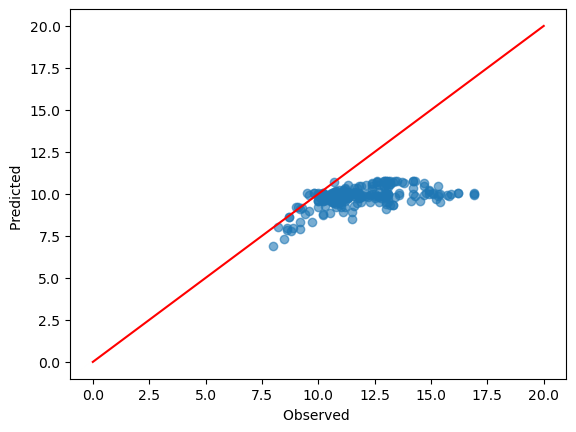

In [42]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.05,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [43]:
params = {"loss": "lad" , #,"huber",
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

correlation_coefficient: 0.5575629776089478
MSE: 0.9864056431575595
RMS: 1.4946436417096163


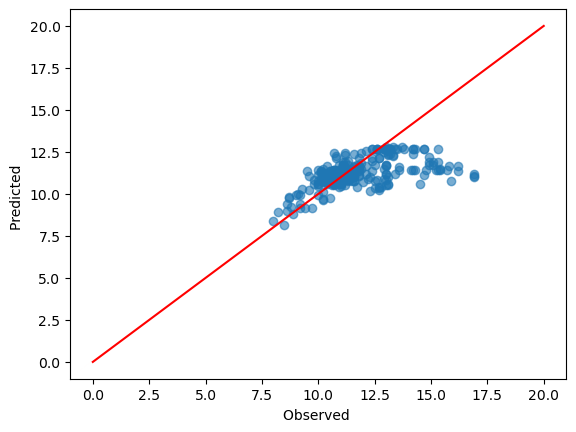

In [44]:
regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [45]:
data = {
    
    "site"  : [ site],
'alt_va': [ alt_va],
    'drain_area_va': [ drain_area_va],
    
"station_nm" :[df3['station_nm'][0]],
    "dec_lat_va":[df3['dec_lat_va'][0]],
    "dec_long_va": [df3['dec_long_va'][0]],
    'max_bias': [max_bias],
        "RMS": [rms],
        "correlation_coefficient": [correlation_coefficient],
    "perm":[perm]
       }
result = pd.DataFrame(data)
print(result)

NameError: name 'perm' is not defined

In [ ]:
file= "result"+site+".csv"
file
result.to_csv(file)

In [ ]:
#perm="tmean..degrees.C."
#perm="log_Q"
#perm="tmean..degrees.C."
perm="tmean..degrees.C. & log_Q"